In [1]:
import xml.etree.ElementTree as ET
import glob
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
def get_num_events(root):
    return sum([int(x.text) for x in root.findall('InputFile/EventsRead')])

In [6]:
def get_timing_metric(root, name):
    return float(root.find('PerformanceReport/PerformanceSummary[@Metric="Timing"]/Metric[@Name="%s"]' % name).attrib['Value'])

In [14]:
# example XML file
tree = ET.parse('reports/report1.xml')
root = tree.getroot()

In [5]:
get_num_events(root)

1196

In [7]:
get_timing_metric(root, "AvgEventTime")

5.96897

In [8]:
get_timing_metric(root, "TotalJobTime")

7138.89

In [9]:
avg_evt_time = []
total_job_time = []
n_events = []

for f in glob.iglob("reports/*.xml"):
    root = ET.parse(f).getroot()
    avg_evt_time.append(get_timing_metric(root, "AvgEventTime"))
    total_job_time.append(get_timing_metric(root, "TotalJobTime"))
    n_events.append(get_num_events(root))
    
avg_evt_time = np.array(avg_evt_time)
total_job_time = np.array(total_job_time)
n_events = np.array(n_events)

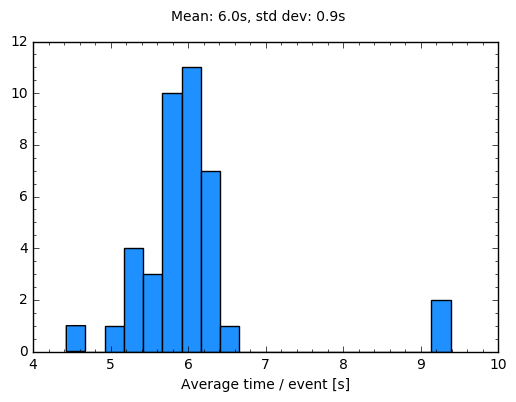

In [10]:
_ = plt.hist(avg_evt_time, bins=20, color='dodgerblue')
plt.xlabel('Average time / event [s]')
plt.suptitle('Mean: %3.1fs, std dev: %3.1fs' % (avg_evt_time.mean(), avg_evt_time.std()))
plt.minorticks_on()

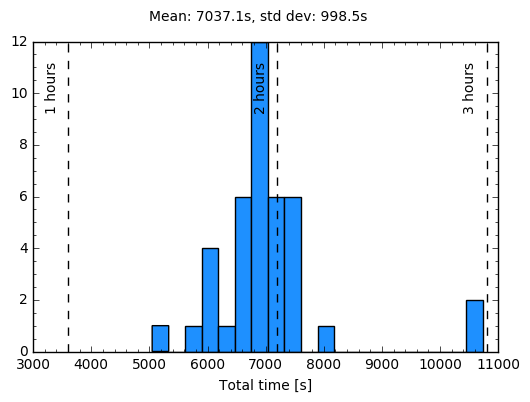

In [11]:
_ = plt.hist(total_job_time, bins=20, color='dodgerblue')
plt.xlabel('Total time [s]')
plt.suptitle('Mean: %3.1fs, std dev: %3.1fs' % (total_job_time.mean(), total_job_time.std()))
plt.minorticks_on()
xlim = plt.xlim()
start_hr = int(xlim[0]) / 3600
end_hr = int(xlim[1]) / 3600
if start_hr > 0 and end_hr > 0 and end_hr - start_hr > 0:
    for hr in range(start_hr, end_hr+1):
        plt.axvline(3600*hr, linestyle='dashed', color='k')
        plt.annotate(s="%d hours" % (hr), xy=(hr*3600-400, 0.9*plt.ylim()[1]), rotation='vertical', color='k')

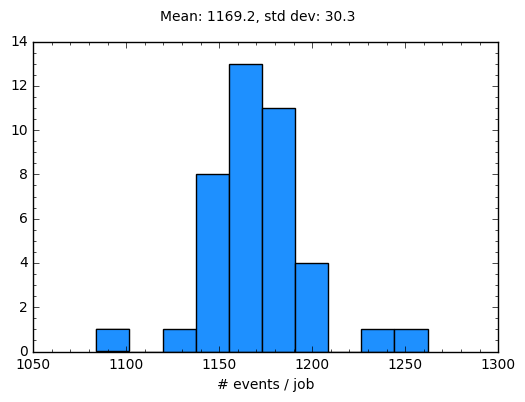

In [12]:
_ = plt.hist(n_events, bins=10, color='dodgerblue')
plt.xlabel('# events / job')
plt.suptitle('Mean: %.1f, std dev: %.1f' % (n_events.mean(), n_events.std()))
plt.minorticks_on()